In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_main = pd.read_csv('data_telco.csv')

In [3]:
df_main.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_main.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check Missing Values
missing_values = df_main.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

missing_values


Series([], dtype: int64)

In [8]:
df_main['Churn'].value_counts()
df_main['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

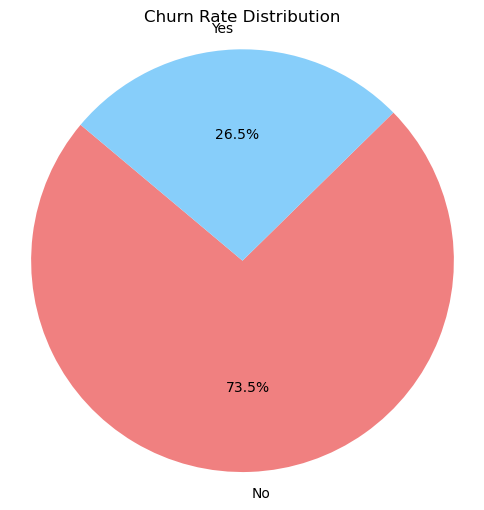

In [9]:
# Pie chart for Churn Distribution
churn_counts = df_main['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral','lightskyblue'])
plt.title('Churn Rate Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


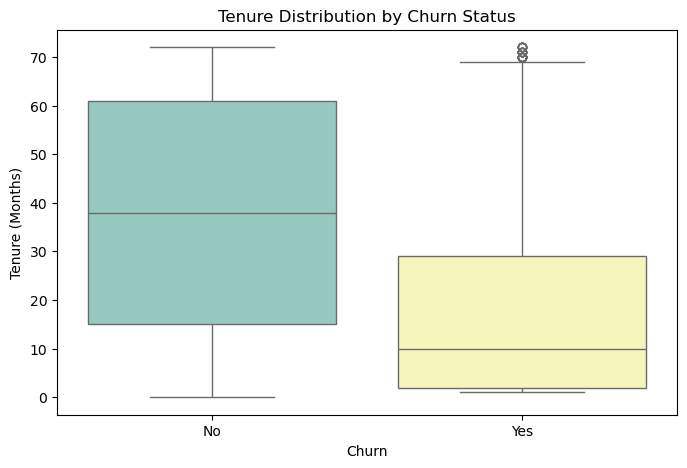

In [10]:
# Tenure Distribution by Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df_main, x='Churn', y='tenure', palette='Set3')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

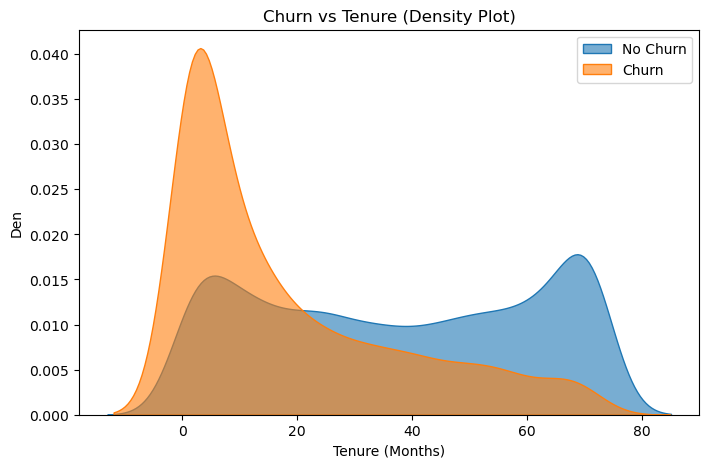

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_main[df_main['Churn'] == 'No'], x='tenure', label='No Churn', fill=True, alpha=0.6)
sns.kdeplot(data=df_main[df_main['Churn'] == 'Yes'], x='tenure', label='Churn', fill=True, alpha=0.6)
plt.title('Churn vs Tenure (Density Plot)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Den')
plt.legend()
plt.show()